### Questions
1. How many hotels are present in the data provided?

2. How many distinct stay dates are present for every hotel?

3. Calculate the average & median ’num_days’ for every HotelID (HotelID--> (avg num_days,median num_days)).Round off the mean,median values to an integer

4. a) Plot the histogram of num_days of hotels 'x11082' and 'x36'

    b) Create a column called "Skewness" with three categories ("Right-tailed", "Left-tailed" and "No skew") based on mean, median of "num_days" created in Step 3. How many hotels' num_days are "Right-tailed", "Left-tailed" and "No skew" ?

5. a) With as_of_date "2020-06-01", select the top 10 hotels with the highest average r2 in June 2020

    b) With as_of_date "2020-06-01", for the top 10 hotels from above, plot time series graphs of r1 and r2 in June 2020 (total of 10 graphs)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_rows = 500

In [2]:
data = pd.read_csv('hoteldata.csv')
data.head()

,stay_date,num_days,r1,r3,r2,rv_1,rv_3,rv_2,as_of_date,HotelID
0,2020-05-01,-2,8,17,9,2420.0,5060.0,2640.0,2020-05-03,x10106
1,2020-05-01,-1,8,17,9,2420.0,5060.0,2640.0,2020-05-02,x10106
2,2020-05-01,0,17,17,0,5060.0,5060.0,-0.0,2020-05-01,x10106
3,2020-05-01,1,24,17,-7,5280.0,5060.0,-220.0,2020-04-30,x10106
4,2020-05-01,2,24,17,-7,5280.0,5060.0,-220.0,2020-04-29,x10106


In [3]:
# Checking for null values in the data
data.isnull().sum()

stay_date     0
num_days      0
r1            0
r3            0
r2            0
rv_1          0
rv_3          0
rv_2          0
as_of_date    0
HotelID       0
dtype: int64

#### 1.How many hotels are present in the data provided?


In [5]:
data['HotelID'].count() 

2421594

#### We have total 2421594 hotels in dataset

In [6]:
data['HotelID'].value_counts() # this command helps to know the count of hotels according to their ID

x65663    34280
x65669    33811
x3697     33363
x1619     33277
x36       32292
x2778     32021
x7286     31214
x1697     30922
x1567     30429
x7273     30366
x3638     30156
x55051    30003
x57472    29081
x14690    29069
x59018    28247
x64566    27706
x65775    27188
x7187     26876
x2090     26812
x1660     26718
x8616     26518
x12056    26477
x65670    26374
x1617     26353
x38       26334
x3591     26026
x13880    25506
x65821    25477
x65834    25396
x15177    24910
x1640     24755
x14916    24744
x8468     24602
x7297     24553
x2788     24485
x65688    24244
x56063    24204
x14685    24057
x1712     23871
x65675    23862
x8324     23846
x59771    23801
x26245    23753
x7299     23598
x19963    23417
x46       23410
x14287    23277
x12144    23258
x57476    23142
x42095    23139
x63885    23114
x7181     23110
x10106    23105
x13360    23040
x65664    22907
x61697    22790
x50752    22757
x65681    22699
x17967    22643
x58520    22611
x19435    22598
x1634     22322
x32073  

#### 2.How many distinct stay dates are present for every hotel?

In [7]:
distinct_stay = data.groupby('stay_date')['HotelID'] # here we are displaying the unique date count how many times it is repeated with the hotel

In [8]:
distinct_stay.nunique() 

stay_date
2020-05-01     35
2020-05-02     33
2020-05-03     35
2020-05-04     39
2020-05-05     41
2020-05-06     41
2020-05-07     42
2020-05-08     42
2020-05-09     44
2020-05-10     43
2020-05-11     49
2020-05-12     54
2020-05-13     58
2020-05-14     62
2020-05-15     66
2020-05-16     68
2020-05-17     69
2020-05-18     72
2020-05-19     77
2020-05-20     79
2020-05-21     77
2020-05-22     81
2020-05-23     83
2020-05-24     83
2020-05-25     87
2020-05-26     87
2020-05-27     88
2020-05-28     88
2020-05-29     88
2020-05-30     88
2020-05-31     90
2020-06-01     90
2020-06-02     91
2020-06-03     91
2020-06-04     95
2020-06-05     97
2020-06-06     97
2020-06-07     95
2020-06-08     99
2020-06-09     99
2020-06-10    100
2020-06-11    100
2020-06-12    100
2020-06-13     99
2020-06-14     99
2020-06-15    100
2020-06-16    100
2020-06-17    100
2020-06-18    100
2020-06-19    100
2020-06-20     99
2020-06-21     97
2020-06-22    100
2020-06-23    100
2020-06-24    100


### Here we see can the count of dates i.e 2020-05-01 date is having 35 different hotel bookings.

In [9]:
distinct_stay1 = data.groupby('HotelID')['stay_date'].nunique()

In [10]:
distinct_stay1

HotelID
x10106    90
x105      71
x11082    90
x12056    56
x12144    76
x13360    90
x13880    90
x14287    90
x14685    72
x14690    79
x14916    89
x15177    75
x1567     77
x16093    69
x1617     80
x1619     90
x1634     66
x1640     79
x1660     90
x1678     78
x1697     90
x1712     73
x17967    89
x19435    80
x19963    55
x2090     87
x2231     69
x26245    90
x2778     90
x2788     77
x30010    79
x32073    87
x345      90
x35306    72
x3591     79
x36       90
x3638     83
x3697     86
x37       56
x38       56
x3891     84
x41599    72
x42095    76
x4369     83
x452      68
x46       56
x48824    73
x49590    78
x49775    75
x49791    72
x50752    79
x55051    87
x56063    90
x56156    78
x57472    69
x57476    76
x58324    76
x58520    77
x589      90
x59018    90
x59771    71
x60266    80
x61697    89
x63885    69
x64566    90
x65216    55
x65649    78
x65663    90
x65664    86
x65669    90
x65670    78
x65675    90
x65681    87
x65683    66
x65688    89
x65693    80
x657

##### Here you can see the Hotel_ID x10106 is booked on 90 distinct days

#### 3. Calculate the average & median ’num_days’ for every HotelID (HotelID--> (avg num_days, median num_days)).Round off the mean,median values to an integer

In [11]:
num_days = data.groupby('HotelID').agg(average = ('num_days','mean'),median = ('num_days','median'))

In [12]:
num_days = num_days.round() # rounded to the integer position.
num_days

,average,median
HotelID,,
x10106,131.0,126
x105,153.0,151
x11082,121.0,114
x12056,238.0,237
x12144,153.0,151
x13360,130.0,126
x13880,146.0,139
x14287,131.0,127
x14685,169.0,165


In [15]:
h_x11082 = data.loc[data['HotelID'] == 'x11082']

<AxesSubplot:title={'center':'x11082 num_days'}, ylabel='Frequency'>

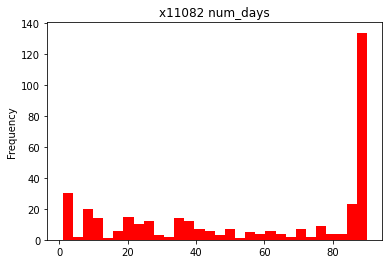

In [16]:
h_x11082['num_days'].value_counts().plot(kind='hist',bins=30,color='red',title='x11082 num_days')

In [17]:
h_x36  = data.loc[data['HotelID'] == 'x36']

<AxesSubplot:title={'center':'x36 num_days'}, ylabel='Frequency'>

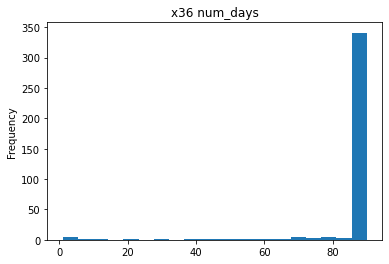

In [18]:
h_x36['num_days'].value_counts().plot(kind='hist',bins=20,title='x36 num_days')

In [19]:
# merge the num_days dataframe and original data frame
df = pd.merge(num_days,data,on='HotelID')
df.head()

,HotelID,average,median,stay_date,num_days,r1,r3,r2,rv_1,rv_3,rv_2,as_of_date
0,x10106,131.0,126,2020-05-01,-2,8,17,9,2420.0,5060.0,2640.0,2020-05-03
1,x10106,131.0,126,2020-05-01,-1,8,17,9,2420.0,5060.0,2640.0,2020-05-02
2,x10106,131.0,126,2020-05-01,0,17,17,0,5060.0,5060.0,-0.0,2020-05-01
3,x10106,131.0,126,2020-05-01,1,24,17,-7,5280.0,5060.0,-220.0,2020-04-30
4,x10106,131.0,126,2020-05-01,2,24,17,-7,5280.0,5060.0,-220.0,2020-04-29


##### Create a column called "Skewness" with three categories ("Right-tailed", "Left-tailed" and "No skew") based on mean, median of "num_days" created in Step 3. How many hotels' num_days are "Right-tailed", "Left-tailed" and "No skew" ?

In [28]:
conditions = [
    (df['average'] == df['median']), 
    (df['average']>df['median']), 
    (df['average']<df['median'] )
]

values = ['noskew','rightskew','leftskew']

df['skewness'] =np.select(conditions,values)

df.head()

,HotelID,average,median,stay_date,num_days,r1,r3,r2,rv_1,rv_3,rv_2,as_of_date,skewness
0,x10106,131.0,126,2020-05-01,-2,8,17,9,2420.0,5060.0,2640.0,2020-05-03,rightskew
1,x10106,131.0,126,2020-05-01,-1,8,17,9,2420.0,5060.0,2640.0,2020-05-02,rightskew
2,x10106,131.0,126,2020-05-01,0,17,17,0,5060.0,5060.0,-0.0,2020-05-01,rightskew
3,x10106,131.0,126,2020-05-01,1,24,17,-7,5280.0,5060.0,-220.0,2020-04-30,rightskew
4,x10106,131.0,126,2020-05-01,2,24,17,-7,5280.0,5060.0,-220.0,2020-04-29,rightskew


In [30]:
df['skewness'].value_counts()

rightskew    2305278
noskew        116316
Name: skewness, dtype: int64

##### In the data we have no left skewed 

### 5(a) With as_of_date "2020-06-01", select the top 10 hotels with the highest average r2 in June 2020

In [20]:
top_10 = df.loc[df['as_of_date'] == '2020-06-01']
top_10_hotel= df.groupby('HotelID').agg(top10_hotels = ('r2','mean')).sort_values(by='top10_hotels',ascending=False).head(10)

In [21]:
top_10

,stay_date,num_days,r1,r3,r2,rv_1,rv_3,rv_2,as_of_date,HotelID
7249,2020-05-30,-2,10,10,0,2640.0,2640.0,0.0,2020-06-01,x10106
7489,2020-05-31,-1,8,8,0,789.0,789.0,0.0,2020-06-01,x10106
7694,2020-06-01,0,11,11,0,2105.0,2105.0,0.0,2020-06-01,x10106
7843,2020-06-02,1,9,5,-4,1455.0,775.0,-680.0,2020-06-01,x10106
7997,2020-06-03,2,9,7,-2,1195.0,1145.0,-50.0,2020-06-01,x10106
...,...,...,...,...,...,...,...,...,...,...
2419869,2020-07-25,54,4,40,36,419.0,4015.0,3596.0,2020-06-01,x9998
2420234,2020-07-26,55,3,26,23,476.0,2522.0,2046.0,2020-06-01,x9998
2420600,2020-07-27,56,7,34,27,954.0,3727.0,2773.0,2020-06-01,x9998
2420966,2020-07-28,57,8,45,37,1120.0,5355.0,4235.0,2020-06-01,x9998


##### 5(b) With as_of_date "2020-06-01", for the top 10 hotels from above, plot time series graphs of r1 and r2 in June 2020 (total of 10 graphs)